### Lasso, Ridge and Elastic Net Regression

Both three extension of classical Multiple Linear (or Polinomial) regression are regularisation techniques (which could also be added to other ML models) that serve to overfitting prevention. Penalty term is added to error function, in a way that sum of coefficient is used as a penal. Penal is multiplied by constants which is used as hyperparameter that enables tuning of the intensity of regularisation ($\lambda$). 
Lasso (L1) regularisation enables complitely elimination of the weights of the least important features, by adding the penalty term as sum of absolute values of feature coefficients at loss function:

$$
J(\theta) = MSE(\theta) + \lambda* \sum \limits _{i=1} ^{n}*|\theta(i)|
$$

Ridge regression does not reduce weak coefficient to the zero, becease of exponent of the coefficient:

$$
J(\theta) = MSE(\theta) + \lambda* \sum \limits _{i=1} ^{n}*\theta(i)^2
$$

Elastic Net mixes both approaches:

$$
J(\theta) = MSE(\theta) + r*\lambda* \sum \limits _{i=1} ^{n}*|\theta(i)| + 1/2*(1-r)* \lambda* \sum \limits _{i=1} ^{n}*\theta(i)^2
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
# We purposely create one 
m=600
x1 = 5 * np.random.rand(m) - 3
x2 = 3 * np.random.rand(m) + x1 - 1
x3 = 2 * np.random.rand(m)*x1 + - 2
x4 = np.random.rand(m) + 2
y = 10* x1**3 + 8*x2**2 + 3*x3 + 3 + x4 +100*np.random.rand(m)

In [3]:
df = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)), axis =1)

In [4]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [5]:
df_pandas = pd.DataFrame(df, columns = ['x1', 'x2', 'x3', 'x4', 'y'])

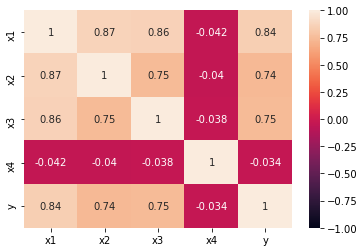

In [6]:
sns.heatmap(df_pandas.corr(),vmax = 1, vmin = -1, annot = True);

In [7]:
lambdas = np.arange(-2, 11, 1)

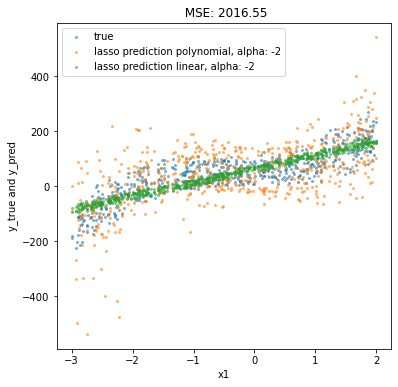

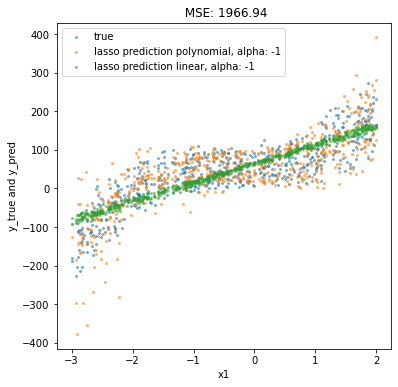

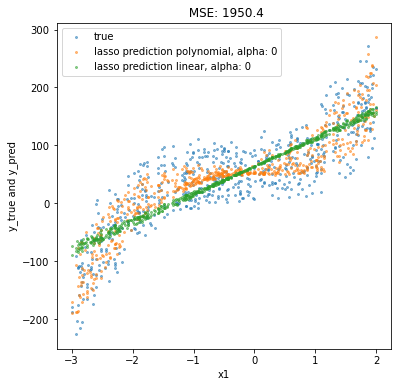

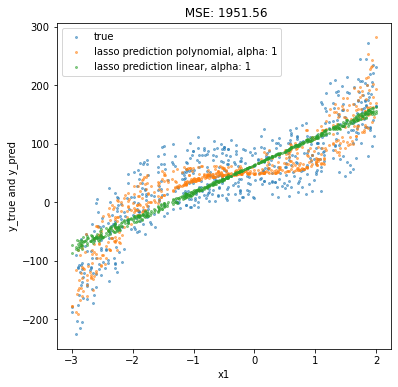

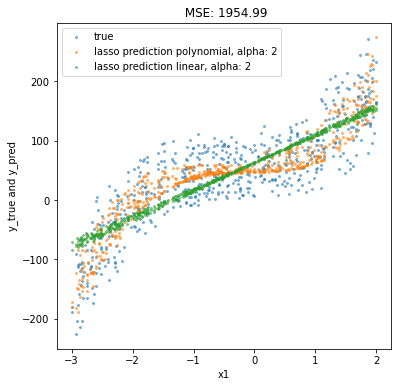

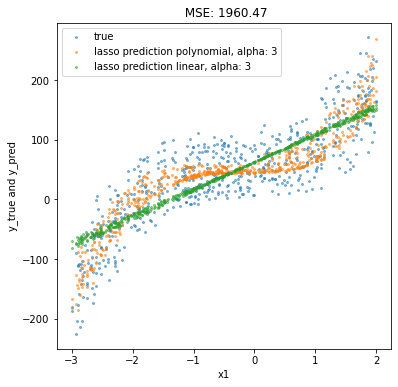

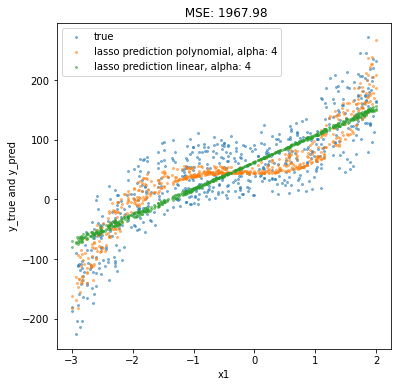

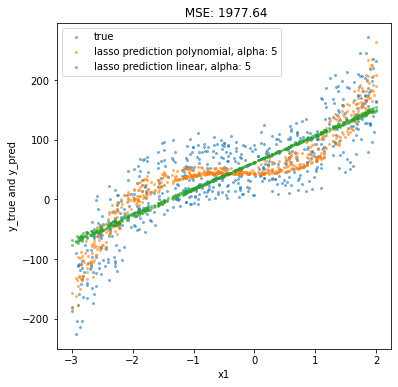

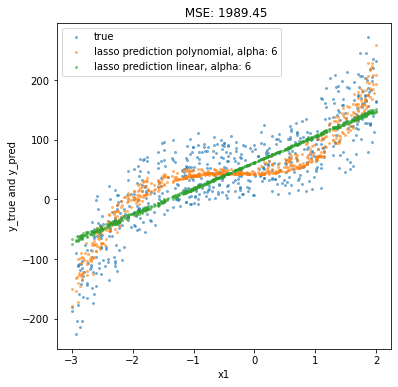

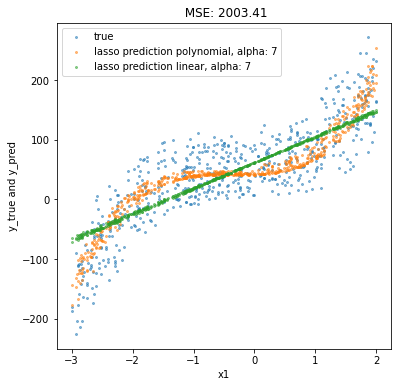

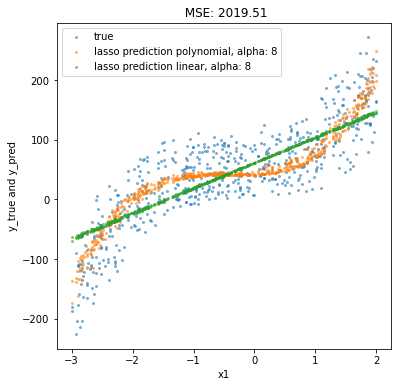

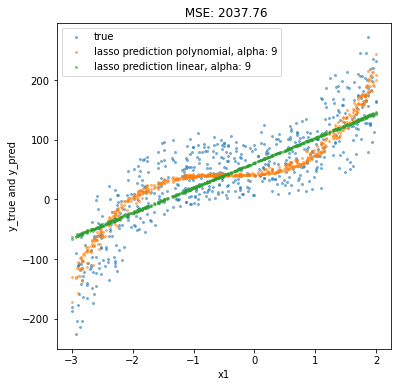

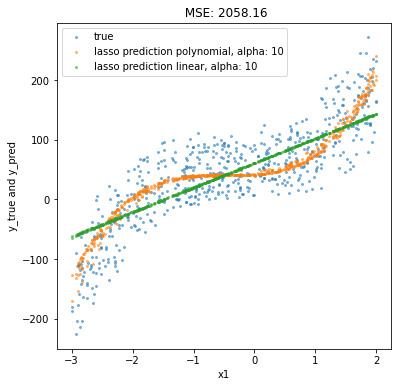

In [8]:
# Here we can see how regularisation work - we got more biased model as we increase regularisation
# With no regularisation (lambda = 0), MSE is smallest
x1_poly_coef = []
x1_reg_coef = []
x2_poly_coef = []
x2_reg_coef = []
x3_poly_coef = []
x3_reg_coef = []
x4_poly_coef = []
x4_reg_coef = []

for lambda_ in lambdas:
    poly_model = PolynomialFeatures(degree=3, include_bias=False)
    x_poly = poly_model.fit_transform(df[:,0:3], df[:,4])
    lin_reg = Lasso(alpha = lambda_)
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    x1_poly_coef.append(lin_reg.coef_[0])
    x2_poly_coef.append(lin_reg.coef_[1])
    x3_poly_coef.append(lin_reg.coef_[2])
    x4_poly_coef.append(lin_reg.coef_[3])
    
    lin_reg_reg = Lasso(alpha = lambda_)
    lin_reg.fit(df[:,0:4],y)
    y_pred_reg = lin_reg.predict(df[:,0:4])
    x1_reg_coef.append(lin_reg.coef_[0])
    x2_reg_coef.append(lin_reg.coef_[1])
    x3_reg_coef.append(lin_reg.coef_[2])
    x4_reg_coef.append(lin_reg.coef_[3])
    
    plt.figure(figsize=(6,6))
    plt.scatter(x1,y, s=4, alpha =0.5, label = 'true')
    plt.scatter(x1, y_pred, s=4, alpha = 0.5, label= f'lasso prediction polynomial, alpha: {round(lambda_,2)}')
    plt.scatter(x1, y_pred_reg, s=4, alpha = 0.5, label= f'lasso prediction linear, alpha: {round(lambda_,2)}')
#     plt.scatter(y, y_pred, label = f'lasso prediction polynomial, alpha: {round(lambda_,2)}')
#     plt.scatter(y, y_pred_reg, label= f'lasso prediction linear, alpha: {round(lambda_,2)}')
    plt.title(f' MSE: {round(mean_squared_error(y, y_pred_reg), 2)}')
    plt.xlabel('x1')
    plt.ylabel('y_true and y_pred')
    plt.legend();

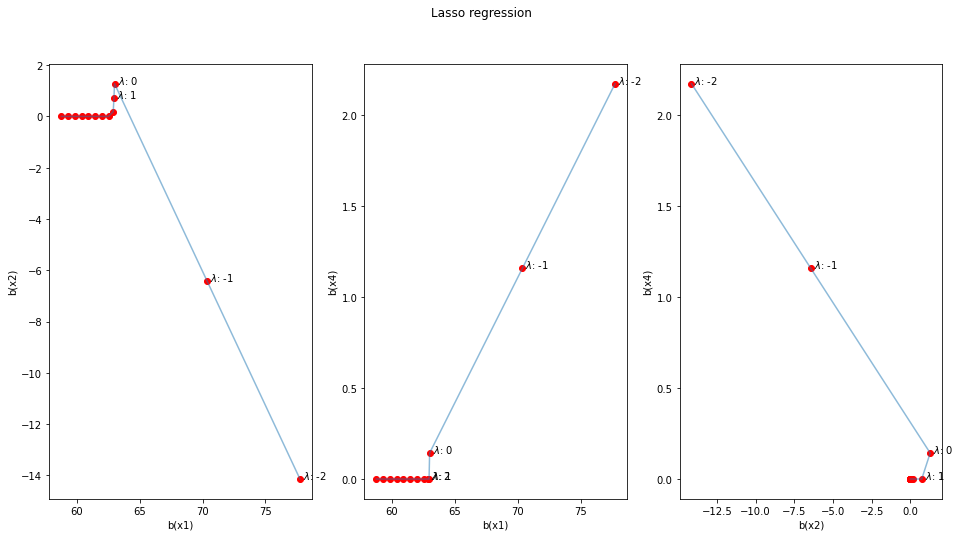

In [9]:
# We can see how regularisation shrinks some coefficients towards zero
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))
fig.suptitle('Lasso regression')
ax1.plot(x1_reg_coef,x2_reg_coef, alpha =0.5, label = 'true')
ax1.scatter(x1_reg_coef,x2_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas[9:]):
    ax1.annotate(f' $\lambda$: {lambdas[i]}', (x1_reg_coef[i], x2_reg_coef[i]))
ax1.set_xlabel('b(x1)')
ax1.set_ylabel('b(x2)');

ax2.plot(x1_reg_coef,x4_reg_coef, alpha =0.5, label = 'true')
ax2.scatter(x1_reg_coef,x4_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas[8:]):
    ax2.annotate(f' $\lambda$: {lambdas[i]}', (x1_reg_coef[i], x4_reg_coef[i]))
ax2.set_xlabel('b(x1)')
ax2.set_ylabel('b(x4)');


ax3.plot(x2_reg_coef,x4_reg_coef, alpha =0.5, label = 'true')
ax3.scatter(x2_reg_coef,x4_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas[9:]):
    ax3.annotate(f' $\lambda$: {lambdas[i]}', (x2_reg_coef[i], x4_reg_coef[i]))
ax3.set_xlabel('b(x2)')
ax3.set_ylabel('b(x4)');


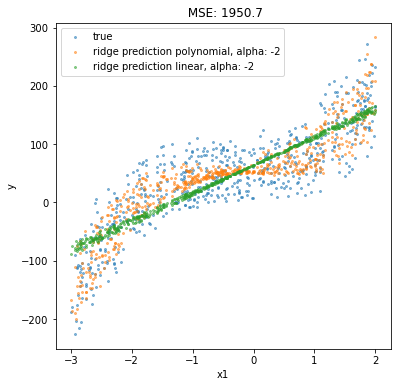

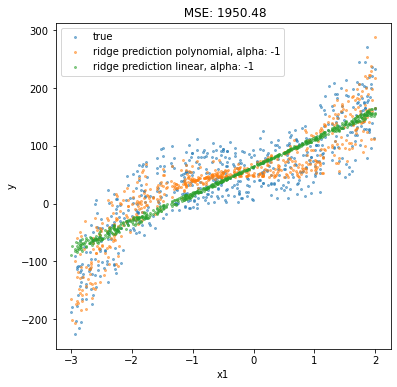

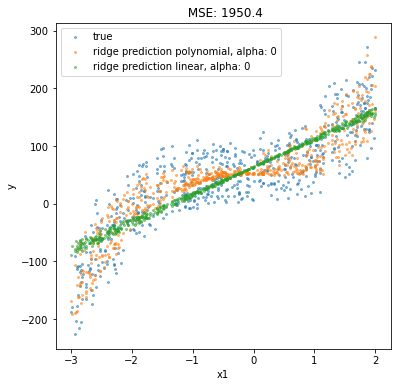

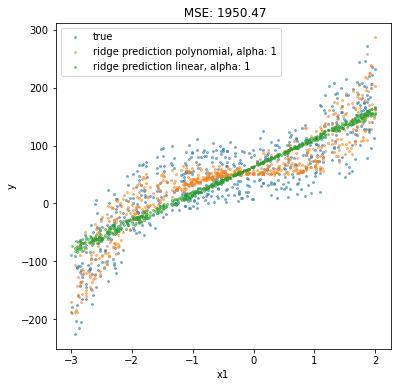

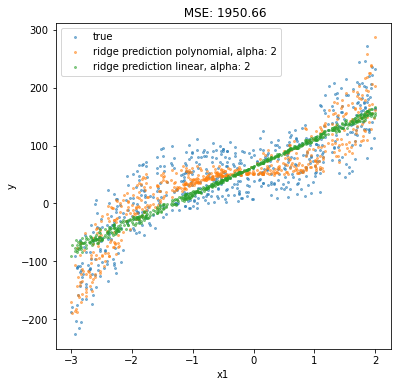

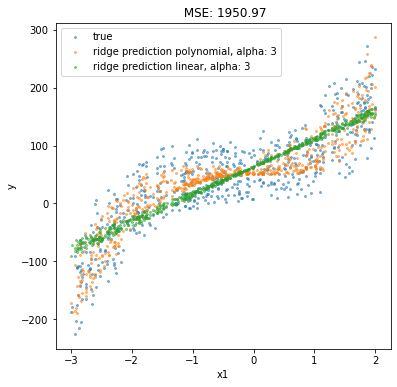

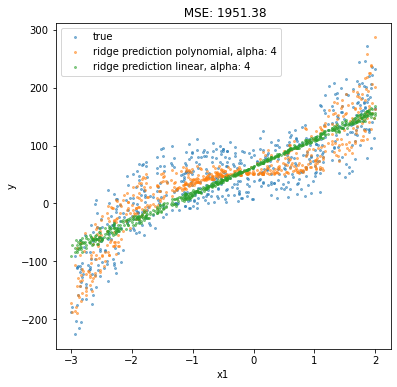

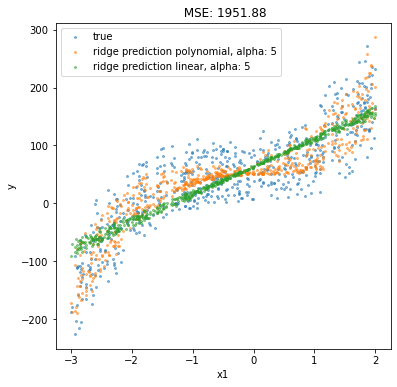

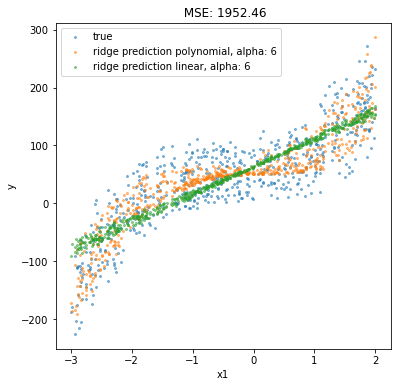

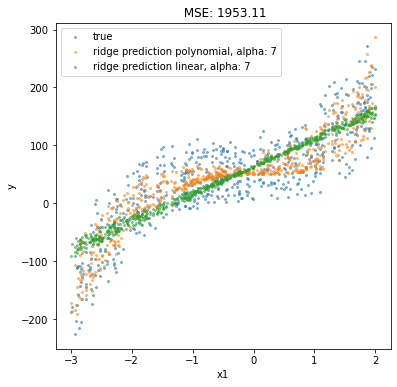

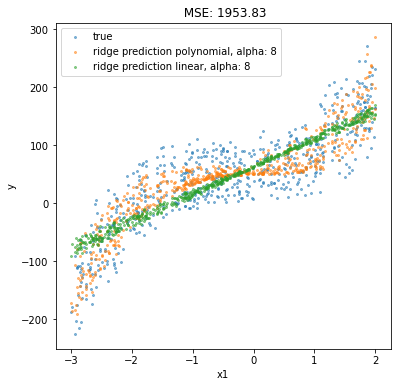

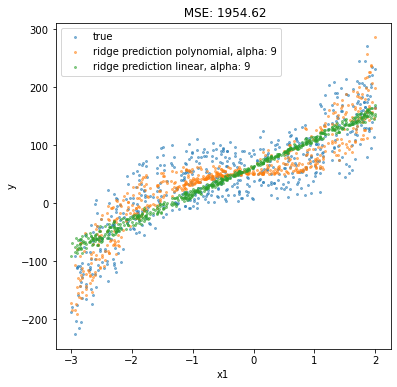

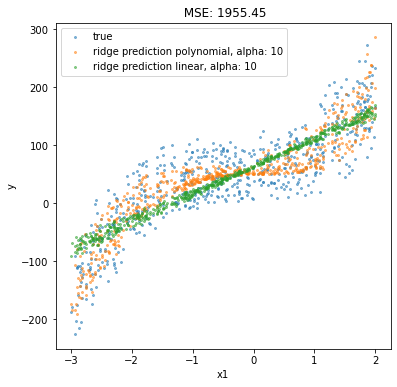

In [10]:
#In comparison to Lasso (L1), Ridge regression will not decrease coefficients b(xi) to zero
# Here we can see how regularisation work - we got more biased model as we increase regularisation
# With no regularisation (lambda = 0), MSE is smallest
x1_poly_coef = []
x1_reg_coef = []
x2_poly_coef = []
x2_reg_coef = []
x3_poly_coef = []
x3_reg_coef = []
x4_poly_coef = []
x4_reg_coef = []

for lambda_ in lambdas:
    poly_model = PolynomialFeatures(degree=3, include_bias=False)
    x_poly = poly_model.fit_transform(df[:,0:3], df[:,4])
    lin_reg = Ridge(alpha = lambda_)
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    x1_poly_coef.append(lin_reg.coef_[0])
    x2_poly_coef.append(lin_reg.coef_[1])
    x3_poly_coef.append(lin_reg.coef_[2])
    x4_poly_coef.append(lin_reg.coef_[3])
    
    lin_reg_reg = Ridge(alpha = lambda_)
    lin_reg.fit(df[:,0:4],y)
    y_pred_reg = lin_reg.predict(df[:,0:4])
    x1_reg_coef.append(lin_reg.coef_[0])
    x2_reg_coef.append(lin_reg.coef_[1])
    x3_reg_coef.append(lin_reg.coef_[2])
    x4_reg_coef.append(lin_reg.coef_[3])
    
    plt.figure(figsize=(6,6))
    plt.scatter(x1,y, s=4, alpha =0.5, label = 'true')
    plt.scatter(x1, y_pred, s=4, alpha = 0.5, label= f'ridge prediction polynomial, alpha: {round(lambda_,2)}')
    plt.scatter(x1, y_pred_reg, s=4, alpha = 0.5, label= f'ridge prediction linear, alpha: {round(lambda_,2)}')
#     plt.scatter(y, y_pred, label = f'lasso prediction polynomial, alpha: {round(lambda_,2)}')
#     plt.scatter(y, y_pred_reg, label= f'lasso prediction linear, alpha: {round(lambda_,2)}')
    plt.title(f' MSE: {round(mean_squared_error(y, y_pred_reg), 2)}')
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.legend();

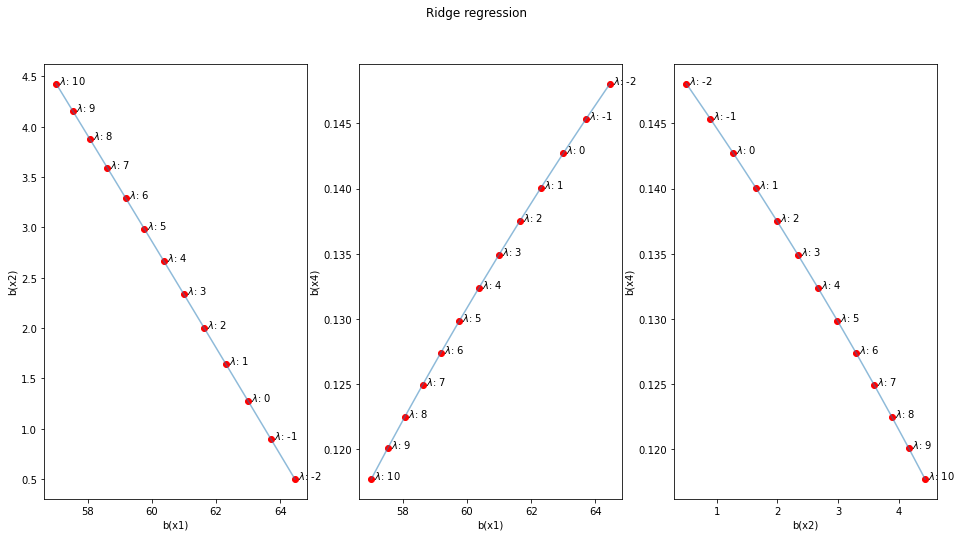

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))
fig.suptitle('Ridge regression')
ax1.plot(x1_reg_coef,x2_reg_coef, alpha =0.5, label = 'true')
ax1.scatter(x1_reg_coef,x2_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas):
    ax1.annotate(f' $\lambda$: {lambdas[i]}', (x1_reg_coef[i], x2_reg_coef[i]))
ax1.set_xlabel('b(x1)')
ax1.set_ylabel('b(x2)');

ax2.plot(x1_reg_coef,x4_reg_coef, alpha =0.5, label = 'true')
ax2.scatter(x1_reg_coef,x4_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas):
    ax2.annotate(f' $\lambda$: {lambdas[i]}', (x1_reg_coef[i], x4_reg_coef[i]))
ax2.set_xlabel('b(x1)')
ax2.set_ylabel('b(x4)');


ax3.plot(x2_reg_coef,x4_reg_coef, alpha =0.5, label = 'true')
ax3.scatter(x2_reg_coef,x4_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas):
    ax3.annotate(f' $\lambda$: {lambdas[i]}', (x2_reg_coef[i], x4_reg_coef[i]))
ax3.set_xlabel('b(x2)')
ax3.set_ylabel('b(x4)');


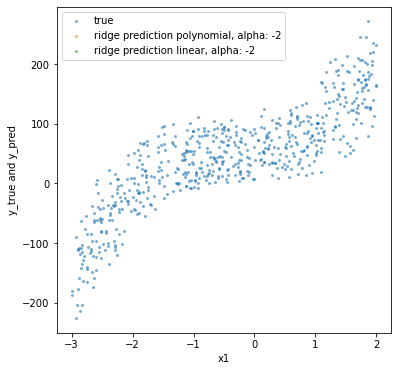

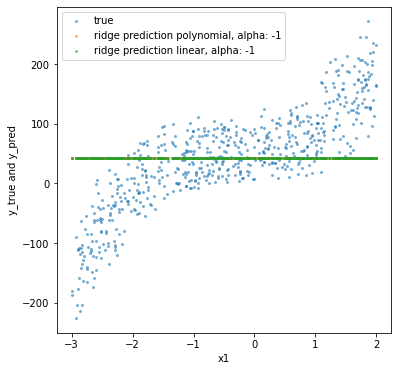

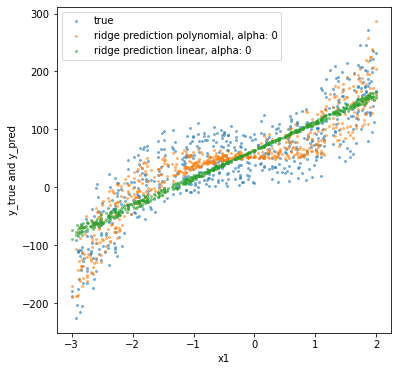

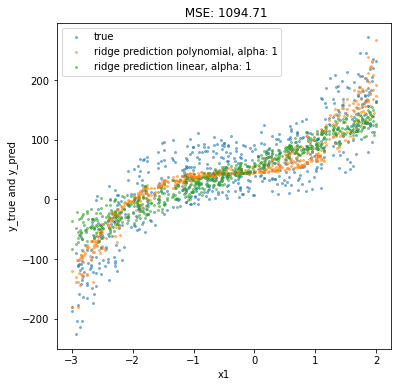

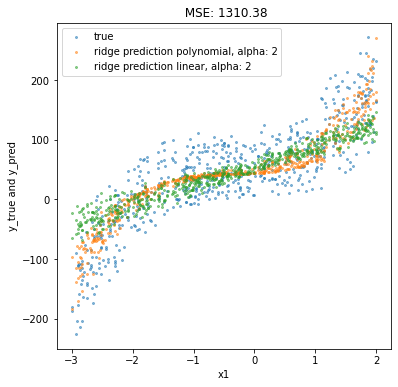

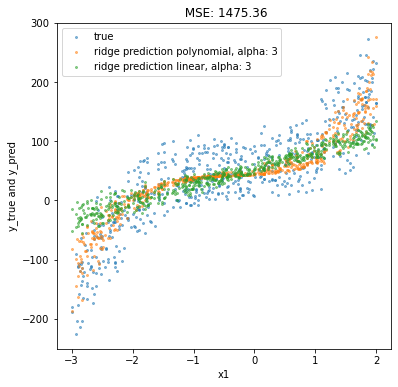

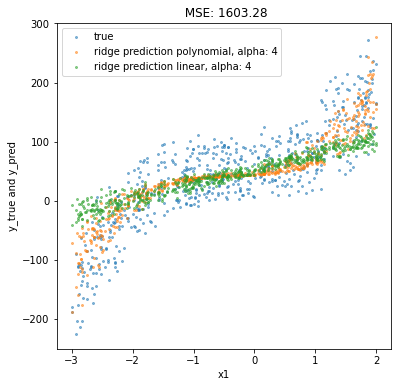

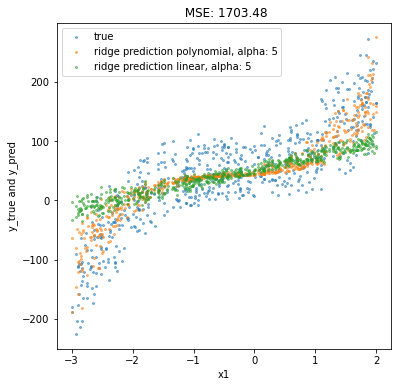

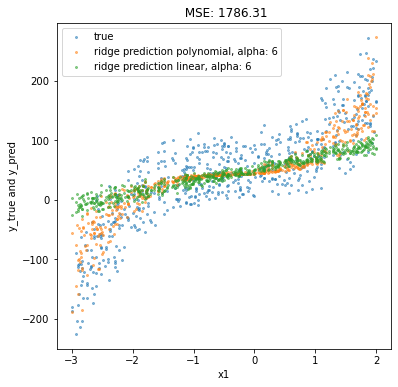

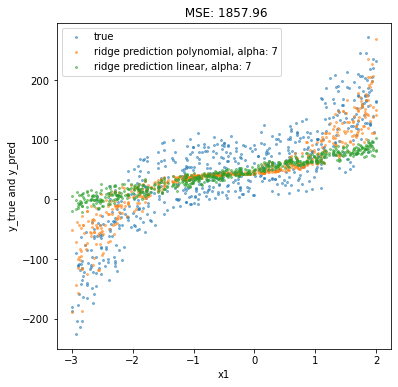

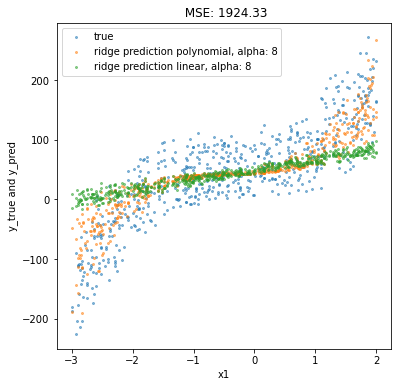

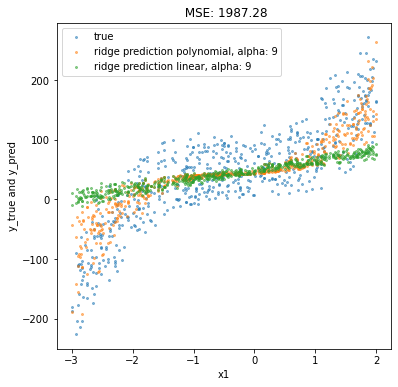

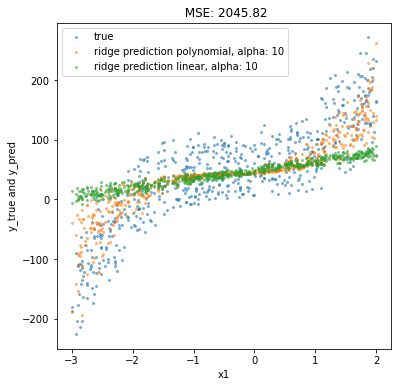

In [19]:
#In comparison to Lasso (L1), Ridge regression will not decrease coefficients b(xi) to zero
# Here we can see how regularisation work - we got more biased model as we increase regularisation
# With no regularisation (lambda = 0), MSE is smallest
x1_poly_coef = []
x1_reg_coef = []
x2_poly_coef = []
x2_reg_coef = []
x3_poly_coef = []
x3_reg_coef = []
x4_poly_coef = []
x4_reg_coef = []

for lambda_ in lambdas:
    poly_model = PolynomialFeatures(degree=3, include_bias=False)
    x_poly = poly_model.fit_transform(df[:,0:3], df[:,4])
    lin_reg = ElasticNet(alpha = lambda_, l1_ratio=0.5)
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    x1_poly_coef.append(lin_reg.coef_[0])
    x2_poly_coef.append(lin_reg.coef_[1])
    x3_poly_coef.append(lin_reg.coef_[2])
    x4_poly_coef.append(lin_reg.coef_[3])
    
    lin_reg_reg = ElasticNet(alpha = lambda_, l1_ratio=0.5)
    lin_reg.fit(df[:,0:4],y)
    y_pred_reg = lin_reg.predict(df[:,0:4])
    x1_reg_coef.append(lin_reg.coef_[0])
    x2_reg_coef.append(lin_reg.coef_[1])
    x3_reg_coef.append(lin_reg.coef_[2])
    x4_reg_coef.append(lin_reg.coef_[3])
    
    plt.figure(figsize=(6,6))
    plt.scatter(x1,y, s=4, alpha =0.5, label = 'true')
    plt.scatter(x1, y_pred, s=4, alpha = 0.5, label= f'ridge prediction polynomial, alpha: {round(lambda_,2)}')
    plt.scatter(x1, y_pred_reg, s=4, alpha = 0.5, label= f'ridge prediction linear, alpha: {round(lambda_,2)}')
#     plt.scatter(y, y_pred, label = f'elastic net prediction polynomial, alpha: {round(lambda_,2)}')
#     plt.scatter(y, y_pred_reg, label= f'elastic net prediction linear, alpha: {round(lambda_,2)}')
    if lambda_>0:
        plt.title(f' MSE: {round(mean_squared_error(y, y_pred), 2)}')
    plt.xlabel('x1')
    plt.ylabel('y_true and y_pred')
    plt.legend();

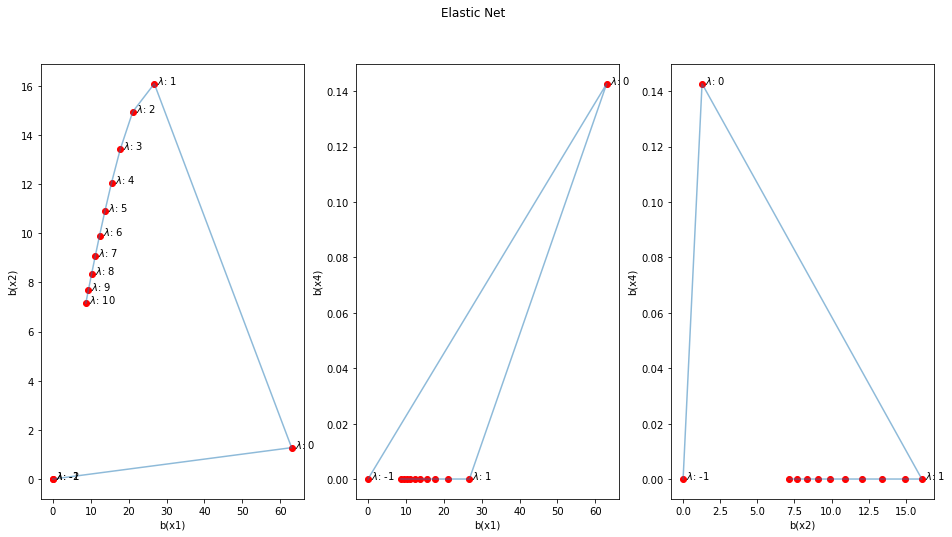

In [18]:
#Elastic Net shows mixture of properties from Lasso and Ridge
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))
fig.suptitle('Elastic Net')
ax1.plot(x1_reg_coef,x2_reg_coef, alpha =0.5, label = 'true')
ax1.scatter(x1_reg_coef,x2_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas):
    ax1.annotate(f' $\lambda$: {lambdas[i]}', (x1_reg_coef[i], x2_reg_coef[i]))
ax1.set_xlabel('b(x1)')
ax1.set_ylabel('b(x2)');

ax2.plot(x1_reg_coef,x4_reg_coef, alpha =0.5, label = 'true')
ax2.scatter(x1_reg_coef,x4_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas[:4]):
    ax2.annotate(f' $\lambda$: {lambdas[i]}', (x1_reg_coef[i], x4_reg_coef[i]))
ax2.set_xlabel('b(x1)')
ax2.set_ylabel('b(x4)');


ax3.plot(x2_reg_coef,x4_reg_coef, alpha =0.5, label = 'true')
ax3.scatter(x2_reg_coef,x4_reg_coef, c = 'r', )
for i, txt in enumerate(lambdas[:4]):
    ax3.annotate(f' $\lambda$: {lambdas[i]}', (x2_reg_coef[i], x4_reg_coef[i]))
ax3.set_xlabel('b(x2)')
ax3.set_ylabel('b(x4)');
